In [1]:
import pandas as pd
import numpy as np
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
from PIL import Image

# nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ju907\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ju907\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [3]:
class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [4]:
def preprocessing_wc(text):
    # tokenize into words
    tokenizer = RegexpTokenizer("[\w]+")
    tokens = tokenizer.tokenize(text)
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]
  
    # useless words
    useless_w = ['ah','oh','eh','uh','yeah','whoa','ooh','ay','em','ya','la','aye','hey','yuh']
    new  = list(set(tokens)-set(useless_w))
    
    return (' '.join(new))

In [5]:
def preprocessing_wc_emotion(text):
        
    # tokenize into words
    tokenizer = RegexpTokenizer("[\w]+")
    tokens = tokenizer.tokenize(text)
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]
    
    
    # emotions words
    emotion_words = pd.read_csv("data/NRC-Emotion-Lexicon.csv")

    emotion_list=[]
    for i, word in emotion_words.iterrows():
        emotion_list.append(word['Words'])
  
    # useless words
    useless_w = ['ah','oh','eh','uh','yeah','whoa','ooh','ay','em','ya','la','aye','hey','yuh']
    new  = list((set(tokens)-set(useless_w)).intersection(emotion_list))
    
     
  
    
    return (' '.join(new))

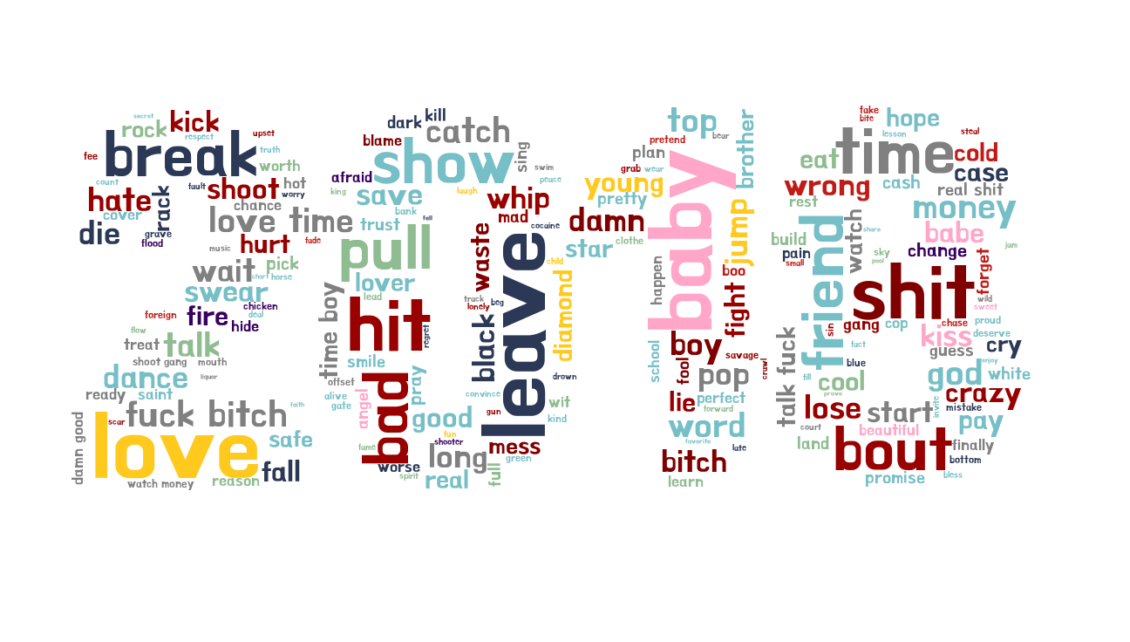

In [8]:
# import collected data
data = pd.read_excel("data/2018_data.xlsx")

# drop the rows that at least one element is NAN
data = data.dropna(axis=0)


#data = data.loc[38:41]

font = 'data/font/BMHANNA_11yrs_ttf.ttf'

positive_data = pd.read_excel("data/words_by_emotions/positive.xlsx")
negative_data = pd.read_csv("data/words_by_emotions/negative.csv")
anger_data = pd.read_excel("data/words_by_emotions/anger.xlsx")
love_data = pd.read_excel("data/words_by_emotions/love.xlsx")
disgust_data = pd.read_excel("data/words_by_emotions/disgust.xlsx")
fear_data = pd.read_excel("data/words_by_emotions/fear.xlsx")
sadness_data = pd.read_csv("data/words_by_emotions/sadness.csv")
joy_antici_data = pd.read_excel("data/words_by_emotions/joy&anticipation.xlsx")
trust_data = pd.read_excel("data/words_by_emotions/trust.xlsx")

positive_list = []
negative_list = []
anger_list = []
love_list=[]
disgust_list = []
fear_list=[]
sadness_list=[]
joy_list=[]
trust_list=[]

for i, word in positive_data.iterrows():
    positive_list.append(word['word'])
    
for i, word in negative_data.iterrows():
    negative_list.append(word['word'])  
    
for i, word in anger_data.iterrows():
    anger_list.append(word['word'])    
    
for i,word in love_data.iterrows():
    love_list.append(word['word'])
    

for i,word in disgust_data.iterrows():
    disgust_list.append(word['word'])
    
for i,word in fear_data.iterrows():
    fear_list.append(word['word'])
    
for i,word in sadness_data.iterrows():
    sadness_list.append(word['word'])    
    
for i,word in joy_antici_data.iterrows():
    joy_list.append(word['word'])    
    
for i,word in trust_data.iterrows():
    trust_list.append(word['word'])


    
color_to_words = {'#C11B17':negative_list,
                  '#8FBC91':positive_list,
                  '#990000':anger_list,
                  '#800000':disgust_list,
                  '#370060':fear_list,
                  '#2B3856':sadness_list,
                  '#FFC91D':joy_list,
                  '#77BFC7':trust_list,
                  '#FFA6C9':love_list}
default_color = 'grey'

grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

text = ''

for i,song in data.iterrows():
      text += (preprocessing_wc_emotion(song['lyric'])+' ')


        
mask = np.array(Image.open('data/Mask/2018.png'))

wordcloud = WordCloud(
    font_path = font,
    width = 1280,
    height = 720,
    background_color="white",
    mask = mask
)
wordcloud = wordcloud.generate(text)
wordcloud.recolor(color_func=grouped_color_func)
fig=plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud_2018.png')
#print(p.preprocessing(data[0]['lyric']))
